# Assignment 4

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

This assignment requires that you to find **at least** two datasets on the web which are related, and that you visualize these datasets to answer a question with the broad topic of **religious events or traditions** (see below) for the region of **Campinas, Sao Paulo, Brazil**, or **Brazil** more broadly.

You can merge these datasets with data from different regions if you like! For instance, you might want to compare **Campinas, Sao Paulo, Brazil** to Ann Arbor, USA. In that case at least one source file must be about **Campinas, Sao Paulo, Brazil**.

You are welcome to choose datasets at your discretion, but keep in mind **they will be shared with your peers**, so choose appropriate datasets. Sensitive, confidential, illicit, and proprietary materials are not good choices for datasets for this assignment. You are welcome to upload datasets of your own as well, and link to them using a third party repository such as github, bitbucket, pastebin, etc. Please be aware of the Coursera terms of service with respect to intellectual property.

Also, you are welcome to preserve data in its original language, but for the purposes of grading you should provide english translations. You are welcome to provide multiple visuals in different languages if you would like!

As this assignment is for the whole course, you must incorporate principles discussed in the first week, such as having as high data-ink ratio (Tufte) and aligning with Cairo’s principles of truth, beauty, function, and insight.

Here are the assignment instructions:

 * State the region and the domain category that your data sets are about (e.g., **Campinas, Sao Paulo, Brazil** and **religious events or traditions**).
 * You must state a question about the domain category and region that you identified as being interesting.
 * You must provide at least two links to available datasets. These could be links to files such as CSV or Excel files, or links to websites which might have data in tabular form, such as Wikipedia pages.
 * You must upload an image which addresses the research question you stated. In addition to addressing the question, this visual should follow Cairo's principles of truthfulness, functionality, beauty, and insightfulness.
 * You must contribute a short (1-2 paragraph) written justification of how your visualization addresses your stated research question.

What do we mean by **religious events or traditions**?  For this category you might consider calendar events, demographic data about religion in the region and neighboring regions, participation in religious events, or how religious events relate to political events, social movements, or historical events.

## Tips
* Wikipedia is an excellent source of data, and I strongly encourage you to explore it for new data sources.
* Many governments run open data initiatives at the city, region, and country levels, and these are wonderful resources for localized data sources.
* Several international agencies, such as the [United Nations](http://data.un.org/), the [World Bank](http://data.worldbank.org/), the [Global Open Data Index](http://index.okfn.org/place/) are other great places to look for data.
* This assignment requires you to convert and clean datafiles. Check out the discussion forums for tips on how to do this from various sources, and share your successes with your fellow students!

## Example
Looking for an example? Here's what our course assistant put together for the **Ann Arbor, MI, USA** area using **sports and athletics** as the topic. [Example Solution File](./readonly/Assignment4_example.pdf)

In [2]:
# Import necessary libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Others libraries
import urllib.request

%matplotlib notebook

#import matplotlib.colors as mcol
#import matplotlib.cm as cm
#from scipy import stats

In [3]:
# Load latin america countries for my research
countries_sheet = pd.ExcelFile('scimagojr.xlsx')
countries = countries_sheet.parse('1996-2017', skip_footer=28)
countries = countries[['Country']]
countries.set_index(['Country'], inplace=True)
countries.head()

""
Country
Brazil
Mexico
Argentina
Chile
Colombia


In [4]:
for year in range(1996,2018):
    aux_year = countries_sheet.parse(str(year))
    aux_year = aux_year[['Country', 'Documents']]
    aux_year.set_index(['Country'], inplace=True)
    aux_year.rename(columns = {'Documents':year}, inplace=True)
    countries = pd.merge(countries, aux_year, how='inner', left_index=True, right_index=True)
countries.to_csv('top20.csv', encoding='utf-8')
countries

,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Country,,,,,,,,,,,,,,,,,,,,,
Brazil,8819,10860,12000,13236,14871,15818,18479,20327,23160,26174,...,42116,46599,50402,54856,60393,63965,67293,68684,72174,73697
Mexico,4590,5246,5662,6222,6513,6945,7582,8877,9582,11032,...,14161,15092,15999,17106,18343,19547,21029,21018,22264,22954
Argentina,4110,4723,4725,5119,5495,5664,6093,6203,6485,6951,...,8975,10076,10695,11628,12134,12248,13374,13347,13488,13308
Chile,1750,1977,1902,2122,2257,2376,2921,3254,3575,4015,...,6034,6695,7113,7827,8907,9317,10999,11557,12930,12714
Colombia,574,666,635,764,867,845,1000,1137,1311,1511,...,3630,4219,4910,5609,6585,7442,8317,8992,10141,10915
Ecuador,99,160,148,136,143,133,174,213,217,292,...,416,500,457,484,648,762,1047,1657,2384,3172
Peru,176,227,198,238,271,281,286,440,466,555,...,799,971,1085,1280,1374,1533,1721,2027,2354,2597
Cuba,741,906,1110,1286,1283,1364,1378,1159,1201,1473,...,1887,2164,1996,2303,2379,2445,2309,2173,1970,1785
Venezuela,1010,1200,1145,1256,1348,1421,1482,1619,1603,1864,...,2317,2400,2219,1975,2070,1972,2018,1780,1620,1530


<IPython.core.display.Javascript object>


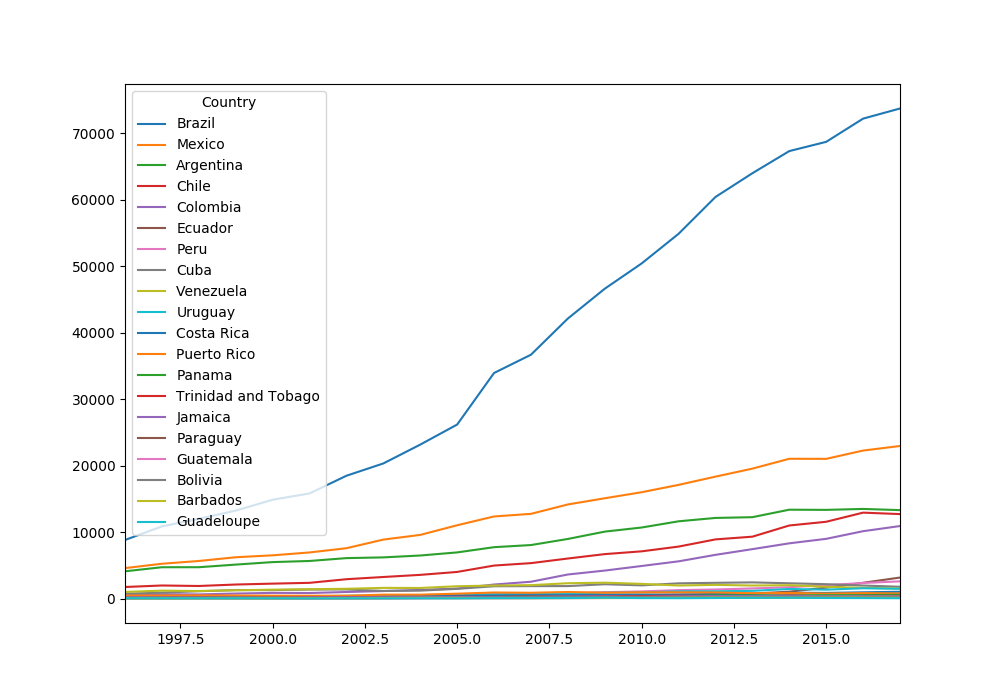

In [5]:
aux = countries.transpose()
aux.plot(figsize=(10,7))

In [6]:
# Load the 'South Ametican grow research.csv' sheet into Panda Dataframe
SAR = pd.read_csv('South American grow research.csv')
SAR.set_index(['Country'], inplace=True)
SAR = SAR.transpose()
#SAR = SAR[['Argentina','Bolivia','Brazil','Chile','Paraguay','Uruguay','Venezuela']]
SAR

Country,Argentina,Bolivia,Brazil,Chile,Colombia,Ecuador,Paraguay,Peru,Uruguay,Venezuela
1996,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1997,1.149148,1.424242,1.231432,1.129714,1.160279,1.616162,1.034483,1.289773,1.228464,1.188119
1998,1.149635,1.530303,1.360698,1.086857,1.106272,1.494949,1.379310,1.125000,1.258427,1.133663
1999,1.245499,1.878788,1.500850,1.212571,1.331010,1.373737,0.724138,1.352273,1.258427,1.243564
2000,1.336983,1.196970,1.686246,1.289714,1.510453,1.444444,0.896552,1.539773,1.393258,1.334653
2001,1.378102,1.393939,1.793627,1.357714,1.472125,1.343434,1.034483,1.596591,1.352060,1.406931
2002,1.482482,1.621212,2.095362,1.669143,1.742160,1.757576,0.965517,1.625000,1.584270,1.467327
2003,1.509246,1.909091,2.304910,1.859429,1.980836,2.151515,1.413793,2.500000,1.790262,1.602970
2004,1.577859,2.075758,2.626148,2.042857,2.283972,2.191919,1.862069,2.647727,1.981273,1.587129
2005,1.691241,2.318182,2.967910,2.294286,2.632404,2.949495,1.931034,3.153409,2.277154,1.845545


<IPython.core.display.Javascript object>


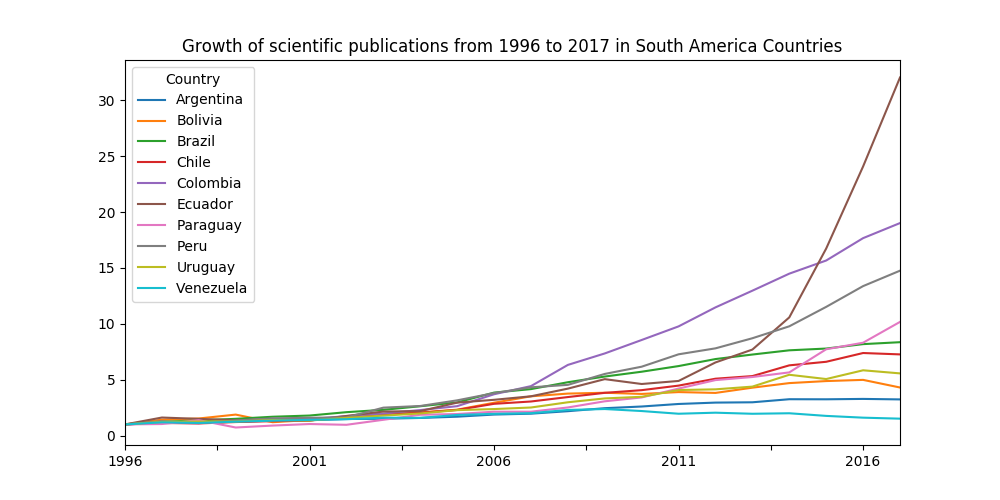

In [7]:
SAR.plot(title="Growth of scientific publications from 1996 to 2017 in South America Countries", figsize=(10, 5))

In [31]:
# Load the 'final cvs with South Ametican grow research.csv' sheet into Panda Dataframe
final = pd.read_csv('final.csv')
final.set_index(['Country'], inplace=True)
final.rename(columns = {'R&D spending in PPP$ (in 1000 mill)':'R&D spending in PPP (in 1000 mill)'}, inplace=True)
final2 = final.transpose()
#final2 = final2[['Argentina','Bolivia','Brazil','Chile','Paraguay','Uruguay','Venezuela']]
final

,R&D spending as % of GDP,Number of researchers per million inhabitants,R&D spending in PPP (in 1000 mill),Scientific Documents 2015,Expenditure of scientific document publishing,Citations,Citations per Document,Poblacion 2015,Expenditures on R&D per capita (US$ PPP),Other: R&D spending in PPP$2
Country,,,,,,,,,,
Argentina,0.5885,1202,5.030100,13347,376871.207013,6491,0.486327,43418000,115.852872,5030100000
Bolivia,0.1567,165,0.078276,322,243093.788820,189,0.586957,10725000,7.298480,78276200
Brazil,1.1700,698,38.447900,68684,559779.570206,30544,0.444703,205962000,186.674726,38447900000
Chile,0.3844,455,1.536800,11557,132975.685732,7549,0.653197,17763000,86.516917,1536800000
Colombia,0.2418,115,1.604800,8992,178469.750890,4551,0.506117,48229000,33.274586,1604800000
Ecuador,0.4415,401,0.805516,1657,486129.269765,1563,0.943271,16144000,49.895701,805516200
Paraguay,0.1293,184,0.060625,224,270647.321429,99,0.441964,6639000,9.131646,60625000
Peru,0.1173,200,0.406482,2027,200533.695116,1540,0.759743,31377000,12.954769,406481800
Uruguay,0.3359,524,0.239830,1351,177520.281273,884,0.654330,3432000,69.880507,239829900


In [182]:
countries = final.index.tolist()
RDspending = final['R&D spending in PPP (in 1000 mill)'].tolist()
tamanhos = [float(x)*90 for x in RDspending]
colors = ['dodgerblue', 'limegreen', 'gold', 'r', 'slateblue', 
          'saddlebrown', 'fuchsia', 'grey', 'c']
x = final['R&D spending as % of GDP'].tolist()
y = final['Number of researchers per million inhabitants'].tolist()
final.index

Index(['Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador',
       'Paraguay', 'Peru', 'Uruguay'],
      dtype='object', name='Country')

<IPython.core.display.Javascript object>


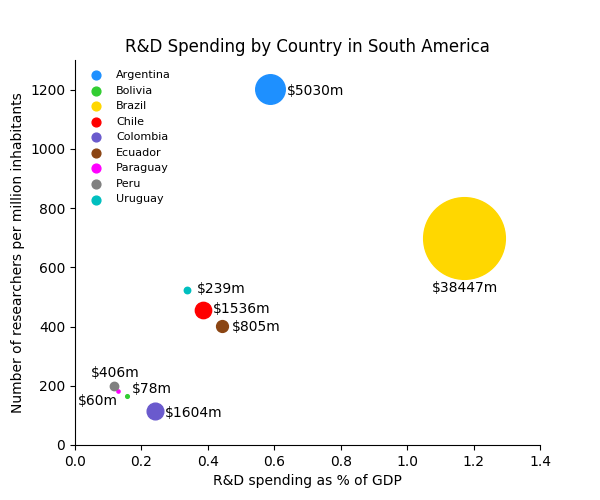

In [183]:
plt.figure(figsize=(6,5))
plt.cla()
plt.gca().axis([0, 1.4, 0, 1300])

# add a label to the x axis
plt.xlabel('R&D spending as % of GDP')
# add a label to the y axis
plt.ylabel('Number of researchers per million inhabitants')
# add a title
plt.title('R&D Spending by Country in South America')
# add a legend (uses the labels from plt.scatter)

for i in range(0,9):
    plt.scatter(x[i], y[i], c = colors[i],
            label = countries[i],
            s = tamanhos[i])

lgnd = plt.legend(loc=2,scatterpoints=1, fontsize=8, frameon = False, framealpha = 0.1)
for i in range(0,9):
    lgnd.legendHandles[i]._sizes = [40]

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

#for i, txt in enumerate(RDspending):
#    plt.annotate(txt, (x[i]+0.02,y[i]+10))

plt.annotate('$'+str(int(RDspending[0]*1000))+'m', (x[0]+0.05,y[0]-20))
plt.annotate('$'+str(int(RDspending[1]*1000))+'m', (x[1]+0.015,y[1]+10))
plt.annotate('$'+str(int(RDspending[2]*1000))+'m', (x[2]-0.095,y[2]-180))
plt.annotate('$'+str(int(RDspending[3]*1000))+'m', (x[3]+0.03,y[3]-9))
plt.annotate('$'+str(int(RDspending[4]*1000))+'m', (x[4]+0.03,y[4]-20))
plt.annotate('$'+str(int(RDspending[5]*1000))+'m', (x[5]+0.03,y[5]-15))
plt.annotate('$'+str(int(RDspending[6]*1000))+'m', (x[6]-0.12,y[6]-50))
plt.annotate('$'+str(int(RDspending[7]*1000))+'m', (x[7]-0.07,y[7]+30))
plt.annotate('$'+str(int(RDspending[8]*1000))+'m', (x[8]+0.03,y[8]-10))


In [190]:
import matplotlib.pyplot as plt2
print(final.columns)
final

Index(['R&D spending as % of GDP',
       'Number of researchers per million inhabitants',
       'R&D spending in PPP (in 1000 mill)', 'Scientific Documents 2015',
       'Expenditure of scientific document publishing', 'Citations',
       'Citations per Document', 'Poblacion 2015',
       'Expenditures on R&D per capita (US$ PPP)',
       'Other: R&D spending in PPP$2'],
      dtype='object')


,R&D spending as % of GDP,Number of researchers per million inhabitants,R&D spending in PPP (in 1000 mill),Scientific Documents 2015,Expenditure of scientific document publishing,Citations,Citations per Document,Poblacion 2015,Expenditures on R&D per capita (US$ PPP),Other: R&D spending in PPP$2
Country,,,,,,,,,,
Argentina,0.5885,1202,5.030100,13347,376871.207013,6491,0.486327,43418000,115.852872,5030100000
Bolivia,0.1567,165,0.078276,322,243093.788820,189,0.586957,10725000,7.298480,78276200
Brazil,1.1700,698,38.447900,68684,559779.570206,30544,0.444703,205962000,186.674726,38447900000
Chile,0.3844,455,1.536800,11557,132975.685732,7549,0.653197,17763000,86.516917,1536800000
Colombia,0.2418,115,1.604800,8992,178469.750890,4551,0.506117,48229000,33.274586,1604800000
Ecuador,0.4415,401,0.805516,1657,486129.269765,1563,0.943271,16144000,49.895701,805516200
Paraguay,0.1293,184,0.060625,224,270647.321429,99,0.441964,6639000,9.131646,60625000
Peru,0.1173,200,0.406482,2027,200533.695116,1540,0.759743,31377000,12.954769,406481800
Uruguay,0.3359,524,0.239830,1351,177520.281273,884,0.654330,3432000,69.880507,239829900


In [214]:
aux2 = final['Expenditure of scientific document publishing'].tolist()
RDspending2 = [float(x)/1000 for x in aux2]
tamanhos2 = [float(x)/2000 for x in aux2]
colors = ['dodgerblue', 'limegreen', 'gold', 'r', 'slateblue', 
          'saddlebrown', 'fuchsia', 'grey', 'c']
x2 = final['Citations'].tolist()
y2 = final['Citations per Document'].tolist()

<IPython.core.display.Javascript object>


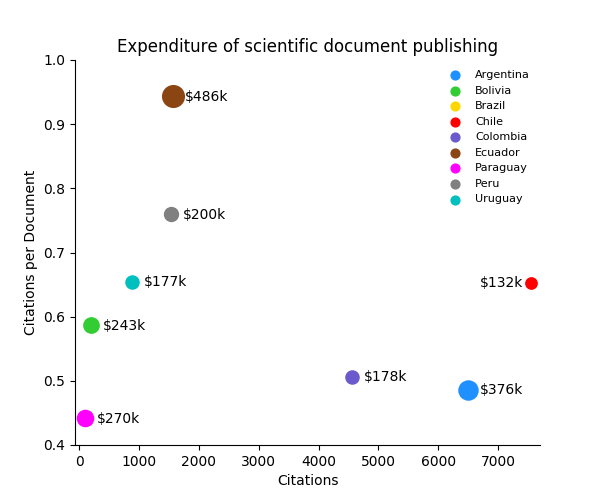

In [233]:
plt2.figure(figsize=(6,5))
plt2.cla()
plt2.gca().axis([-70, 7700, 0.4, 1])

# add a label to the x axis
plt2.xlabel('Citations')
# add a label to the y axis
plt2.ylabel('Citations per Document')
# add a title
plt2.title('Expenditure of scientific document publishing')
#plt2.title('The Cost of the Science in South America')
# add a legend (uses the labels from plt.scatter)

for i in range(0,9):
    plt2.scatter(x2[i], y2[i], c = colors[i],
            label = countries[i],
            s = tamanhos2[i])

lgnd2 = plt2.legend(loc=1,scatterpoints=1, fontsize=8, frameon = False)
for i in range(0,9):
    lgnd2.legendHandles[i]._sizes = [40]

plt2.gca().spines['top'].set_visible(False)
plt2.gca().spines['right'].set_visible(False)

#for i, txt in enumerate(RDspending):
#    plt.annotate(txt, (x[i]+0.02,y[i]+10))

plt2.annotate('$'+str(int(RDspending2[0]))+'k', (x2[0]+200,y2[0]-0.007))
plt2.annotate('$'+str(int(RDspending2[1]))+'k', (x2[1]+200,y2[1]-0.007))
plt2.annotate('$'+str(int(RDspending2[2]))+'k', (x2[2]+200,y2[2]-0.007))
plt2.annotate('$'+str(int(RDspending2[3]))+'k', (x2[3]-850,y2[3]-0.007))
plt2.annotate('$'+str(int(RDspending2[4]))+'k', (x2[4]+200,y2[4]-0.007))
plt2.annotate('$'+str(int(RDspending2[5]))+'k', (x2[5]+200,y2[5]-0.007))
plt2.annotate('$'+str(int(RDspending2[6]))+'k', (x2[6]+200,y2[6]-0.007))
plt2.annotate('$'+str(int(RDspending2[7]))+'k', (x2[7]+200,y2[7]-0.007))
plt2.annotate('$'+str(int(RDspending2[8]))+'k', (x2[8]+200,y2[8]-0.007))